In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import pandas as pd
from pathlib import Path

/var/folders/07/231x2gks4j5fvh_h32tcwgfm0000gn/T/ipykernel_87697/448617169.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
chip_pos_raw = pd.read_pickle('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-14_SC22/trial4/chip_pos_raw_store.pkl')
chip_pos_est = pd.read_pickle('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-14_SC22/trial4/chip_pos_store.pkl')
mouse_pos = pd.read_pickle('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-14_SC22/trial4/mouse_pos_store.pkl')

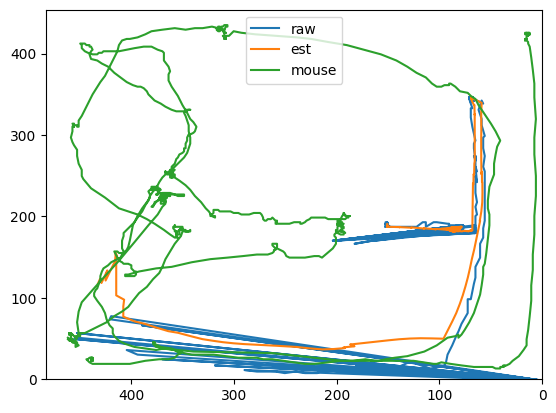

In [16]:
plt.plot(chip_pos_raw[:, 0], chip_pos_raw[:, 1], label='raw')
plt.plot(chip_pos_est[:, 0], chip_pos_est[:, 1], label='est')
plt.plot(mouse_pos[:, 0], mouse_pos[:, 1], label='mouse')
plt.xlim(0, 483)
plt.ylim(0, 454)
plt.gca().invert_xaxis()
plt.legend()

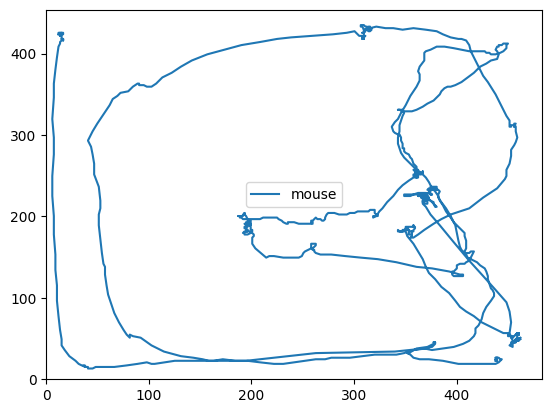

In [7]:
plt.plot(mouse_pos[:, 0], mouse_pos[:, 1], label='mouse')
plt.xlim(0, 483)
plt.ylim(0, 454)
plt.legend()

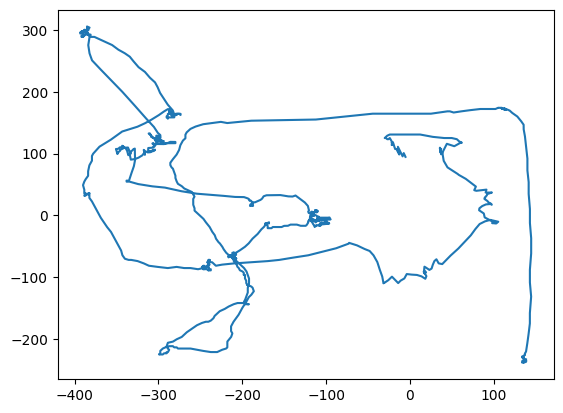

In [8]:
diff_vec = chip_pos_est - mouse_pos
plt.plot(diff_vec[:, 0], diff_vec[:, 1], label='diff')

[ 511  513  522  525  528  534  639 1487 1488 1489 1490 1491 1492 1493
 1494 1504 1505 1506 1507 1510 1511 1512 1513 1514 1515 1516 1517 1518
 1519 1520 1521 1522 1523 1524 1525 1526 1527 1528 1529 1530 1531 1534
 1536 1537 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549
 1550 1551 1552 1554 1556 1557 1558 1559 1560 1561 1562 1563 1614 1617
 1619]


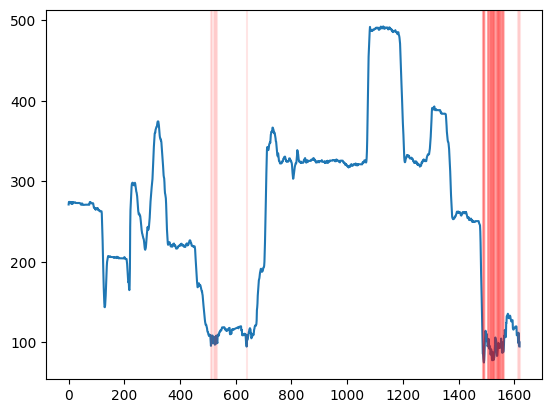

In [14]:
diff_norm = np.linalg.norm(diff_vec, axis=1)
coord = np.where(diff_norm < 100)[0]
print(coord)
plt.plot(diff_norm, label='diff_norm')
for i in coord:
    plt.axvline(x=i, color='r', alpha=0.1)
# plt.axvspan()

In [47]:
def fill_in_null(data):
    # Find indices of null values
    null_indices = np.isnan(data)
    
    # Find indices of valid values
    valid_indices = np.where(~null_indices)[0]

    interp_data = np.nan * np.empty(data.shape)
    
    # Interpolate null values using linear interpolation
    interp_data[null_indices] = np.interp(np.where(null_indices)[0], valid_indices, data[valid_indices])
    
    edge_idx = np.diff(null_indices.astype(int))
    edge_idx1 = np.where(edge_idx > 0)[0]
    edge_idx2 = np.where(edge_idx < 0)[0]

    print(data[edge_idx1])
    print(data[edge_idx2+1])
    interp_data[edge_idx1] = data[edge_idx1]
    interp_data[edge_idx2+1] = data[edge_idx2+1]

    return interp_data

[181.125    289.8      318.478125 369.796875 404.5125   421.115625
 389.41875  452.8125   452.8125   452.8125  ]
[211.3125   318.478125 369.796875 393.946875 419.60625  389.41875
 452.8125   452.8125   452.8125   452.8125  ]
[17.025      11.35       17.025      24.59166667 35.94166667 73.775
 66.20833333 56.75       49.18333333 49.18333333]
[13.24166667 17.025      24.59166667 30.26666667 77.55833333 66.20833333
 56.75       49.18333333 49.18333333 51.075     ]


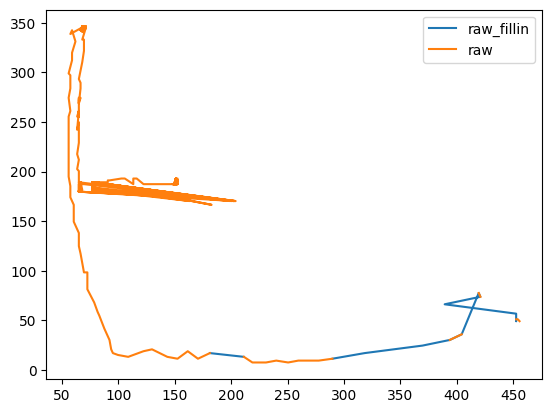

In [48]:
nan_idx = np.where(chip_pos_raw < 0)[0]
chip_pos_raw[nan_idx] = np.nan
chip_pos_raw_fillin_x = fill_in_null(chip_pos_raw[:, 0])
chip_pos_raw_fillin_y = fill_in_null(chip_pos_raw[:, 1])
chip_pos_raw_fillin = np.vstack((chip_pos_raw_fillin_x, chip_pos_raw_fillin_y)).T
chip_pos_raw_masked = chip_pos_raw[~np.isnan(chip_pos_raw).any(axis=1)]
plt.plot(chip_pos_raw_fillin[:, 0], chip_pos_raw_fillin[:, 1], label='raw_fillin')
plt.plot(chip_pos_raw[:, 0], chip_pos_raw[:, 1], label='raw')
plt.legend()

In [49]:
logs = pd.read_pickle('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-14_fast_speed_analysis/2024-03-14_SC22_trial4.pkl')

In [51]:
logs.keys()

Index(['datetime', 'mouse_px_x', 'mouse_px_y', 'chip_px_x', 'chip_px_y',
       'mouse_raw_x', 'mouse_raw_y', 'chip_raw_x', 'chip_raw_y', 'mouse_est_x',
       'mouse_est_y', 'chip_est_x', 'chip_est_y', 'state', 'distance', 'vec_x',
       'vec_y', 'send_signal_x', 'send_signal_y', 'tangent_vector_x',
       'tangent_vector_y'],
      dtype='object')

In [60]:
gt = np.stack([logs['send_signal_x'], logs['send_signal_y']], axis=1) * 5
gt.shape

(1620, 2)

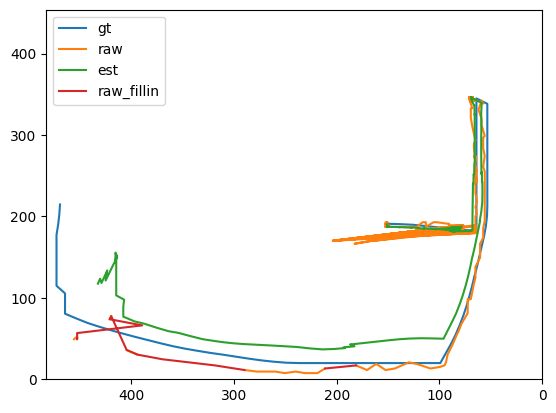

In [65]:
gt_int = -np.cumsum(gt, axis=0) + chip_pos_raw[0]
plt.plot(gt_int[:, 0], gt_int[:, 1], label='gt')
plt.plot(chip_pos_raw[:, 0], chip_pos_raw[:, 1], label='raw')
plt.plot(chip_pos_est[:, 0], chip_pos_est[:, 1], label='est')
plt.plot(chip_pos_raw_fillin[:, 0], chip_pos_raw_fillin[:, 1], label='raw_fillin')
plt.xlim(0, 483)
plt.ylim(0, 454)
plt.gca().invert_xaxis()
plt.legend()

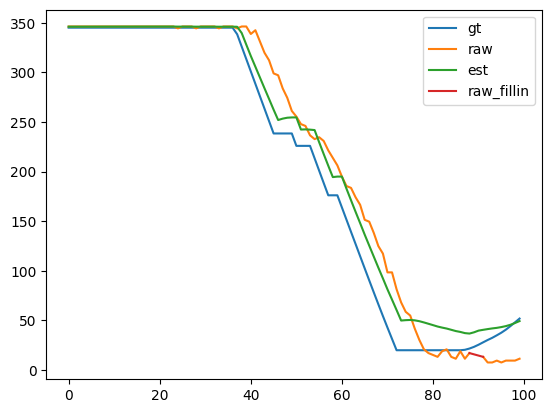

In [68]:
idx = 1500
pad = 50
plt.plot(gt_int[idx-pad:idx+pad, 1], label='gt')
plt.plot(chip_pos_raw[idx-pad:idx+pad, 1], label='raw')
plt.plot(chip_pos_est[idx-pad:idx+pad, 1], label='est')
plt.plot(chip_pos_raw_fillin[idx-pad:idx+pad, 1], label='raw_fillin')
# plt.xlim(0, 483)
# plt.ylim(0, 454)
# plt.gca().invert_xaxis()
plt.legend()